# SyriaTel Customer


### Business Understanding

SyriaTel is a communication company that deals with Call-related services calls and messaging services. The company is realising revenue loss due to custmers churn. there are various reasons why customers would terminate the their business woth SeriaTel; among them are quality of services provided and the cost of call or messeges etc. To understand the root cause of the customer churn, it is important to develop a model that will predict potential customer churn, thus identifying the factors that increase the rate of customers's customers churn. This will help company take necesary actions to reduce churn.

### Project Objective

The primary objective is to develop a robust predictive model to identify customers at risk of churning from SyriaTel, our telecommunications company. By understanding and predicting customer churn, we aim to minimize revenue loss and proactively implement retention strategies.
#### Key Questions 
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?

#### Scope
The scope of this project encompasses the analysis of historical customer data to identify patterns and indicators associated with churn. The focus is on developing a binary classification model that can effectively distinguish between customers likely to churn and those likely to stay.


#### Key Stakeholders
1.	Telecom Operations Team:  They are interested in reducing churn as it directly impacts revenue and customer satisfaction.
2.	Marketing Team: The marketing team can leverage insights from the model to design targeted campaigns aimed at retaining at-risk customers.
3.	Customer Service Team: Proactive identification of potential churners enables the customer service team to intervene and address issues promptly, enhancing customer satisfaction.

#### Data Sources 
Data sources include customer profiles, usage patterns, billing information, customer service interactions, contract details, and network performance metrics. The dataset should be representative of diverse customer segments and cover a sufficient historical period.

#### Key Questions
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?


#### Success Criteria
The success of the project will be evaluated based on the model's predictive accuracy, precision, recall, and the ability to identify potential churners before they actually leave. The business impact will be measured by a reduction in churn rates and an increase in overall customer retention.

#### Risks 
Ethical Considerations: Ensuring the ethical use of customer data and compliance with privacy regulations is paramount.

#### Challenges
1.	Data Quality: Incomplete or inaccurate data may affect the model's performance.
2.	Changing Market Dynamics: Rapid changes in the telecom market may influence customer behavior, requiring the model to adapt.



### Data Understanding 


##### importing libraries to load and interprete data

In [1]:
#importing the neccesary libraries for our analysis
import pandas as pd #
import numpy as np#
import matplotlib.pyplot as plt #
import seaborn as sns#
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data into a dataframe and previewing the first 5 rows just to see how our data looks like
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv') # using pandas to read the csv file containing the data
pd.set_option('display.max_columns', None)# inbuilt function ensures that all our columns are displayed rather than just half version 
#of it
df.head()# display of the first five rows of the data set

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Description of the Dataset 
##### Customer Profiles
Includes demographic information, subscription details, and customer identifiers.

#####	Usage Patterns:
Data on call frequency, duration, data usage, and text messaging.

#### Billing Information:
Payment history, overdue payments, and spending patterns.

### Checking for Data Accuracy

In [3]:
df.shape # I'm looking at the shape of the data to understand the number of rows and columns 

(3333, 21)

In [4]:
df.info() # Checking the characteristic of and components of the DataFrame;  including the size, column names, data types, and the number
        # missin valuse , if present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df['state'].value_counts() # check fror distibution

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
NV     66
CO     66
WA     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

#### Dataset Description

Size and Structure:

Number of Rows : 3333 entries, ranging from 0 to 3332. 

Number of Columns: There are 21 columns in the DataFrame.

Column Information:

Columns include various types of data, such as integers, floats, objects (likely strings), and a boolean (churn column).

Some notable columns include state, account length, area code, phone number, international plan, voice mail plan, and several others.



#### Checking the distribution of Churnning Customers in the dataset

In [6]:
# Calculating churn state_churn_rates

total_customers = len(df) # calculating the total number of customers in the dataset 
churned_customers = df['churn'].sum() # culcalting the total number of customer whose churn state is 'True'

churn_rate = churned_customers / total_customers # calculating the percetage of the 'True' customers 

print(f"Churn Rate: {churn_rate:.2%}") # dsplaying the result of our calculation


Churn Rate: 14.49%


In [7]:
df['churn'].value_counts() # counting the number of element in each category of 'True' and 'False' state of customer churn. True indicates
                           # that the custumer ended the their service with SyriaTel, False shows that the customer is still present.

False    2850
True      483
Name: churn, dtype: int64

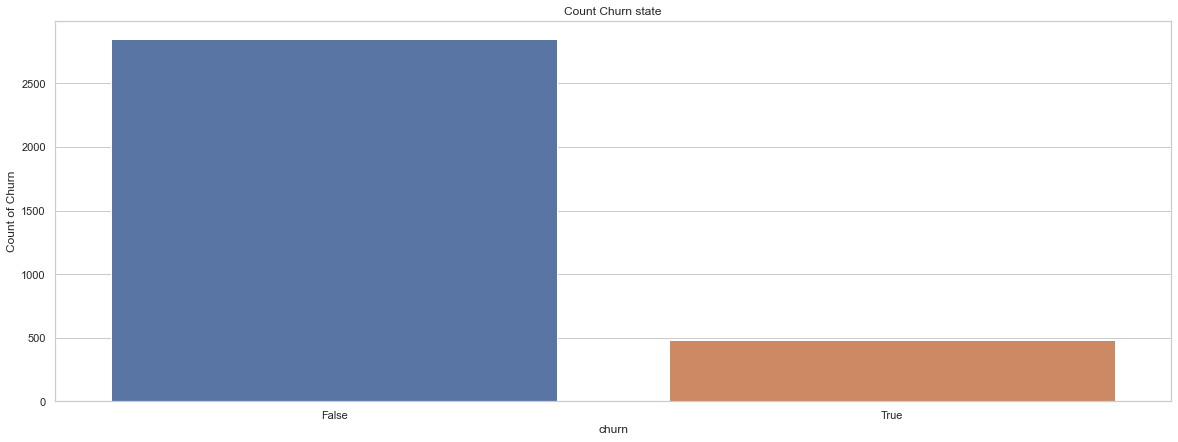

In [8]:
# ploting the disticnution of customers churn state
plt.figure(figsize=(20,7))
sns.set(style='whitegrid')
sns.countplot(df['churn'])
plt.title('Count Churn state')
plt.xlabel('churn')
plt.ylabel('Count of Churn')
plt.show()

It is clear that churn rate of SyriaTel is 14.49% which is alarminng. That is roughly 14% revenue loss.  

### Exploratory Data Analysis

#### Missing Values:


In [9]:

#This code computes and displays information about missing data in your DataFrame, including the overall number of missing values and 
# their percentage for each column, sorted by the percentage of missing values. It helps to determine which columns have the 
# most missing data, which is important for preprocessing and cleaning up the data.
total=df.isnull().sum().sort_values(ascending=False)#This determines how many missing values (NaN) there are overall in each column 
#of the DataFrame df. The count of missing values in each column is returned as a Series with the column names as indices and values.
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)#This arranges the Series in descending order, with 
#the columns having the most missing values at the top, after calculating the missing values in each column.
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])#The two Series formed in steps 1 and 3 are combined into a 
# new DataFrame called missing_data by this line. The column headings "Total" and "Percent" denote the overall count and percentage of 
# missing values in each column, respectively, and they are arranged side by side.
missing_data

,Total,Percent
churn,0,0.0
total day charge,0,0.0
account length,0,0.0
area code,0,0.0
phone number,0,0.0
international plan,0,0.0
voice mail plan,0,0.0
number vmail messages,0,0.0
total day minutes,0,0.0
total day calls,0,0.0


The the are no missing values in the dataset.

####  Outliers: 

In [10]:
def Outliers(df):
    df = df.select_dtypes(include=['int64', 'float64'])  # Selecting numerical columns
    for col in df.columns:
        data_mean, data_std = df[col].mean(), df[col].std()  
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # Identify and handle outliers
        outliers = (df[col] < lower) | (df[col] > upper)
        df.loc[outliers, col] = df[col].median()  

    return df

In [11]:
Outliers(df)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128.0,415.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,107.0,415.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,137.0,415.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,84.0,408.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,75.0,415.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,415.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0
3329,68.0,415.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0
3330,28.0,510.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0
3331,184.0,510.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0


#### Featuture Engineering

##### 1. Categotical Data:

In [12]:
# Replace 'international plan' and 'voice mail plan' with binary values 
columns_to_encode = ['international plan', 'voice mail plan']

# replacing 'yes' and 'no' with 1 and 0 using a mapping
encoding_map = {
    'yes': 1,
    'no': 0,
}

# Applying the mapping to each column
df[columns_to_encode] = df[columns_to_encode].replace(encoding_map)


#### 2. Calculating Total Charges

In [13]:

# Calculating the total call charge in 24 hour time 

df['Total_Cost']=df['total day charge'] +df['total eve charge']+df['total night charge'] # calculating the cost of call in 24-hour time and
                                                                                        # appending the column to the dataset
df.head() # displaying the first 5 rows 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total_Cost
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36


#### 3. Distribution of churn rate across states 

State with the Highest Churn: CA (Churn Rate: 26.47%)
State with the Lowest Churn: HI (Churn Rate: 5.66%)


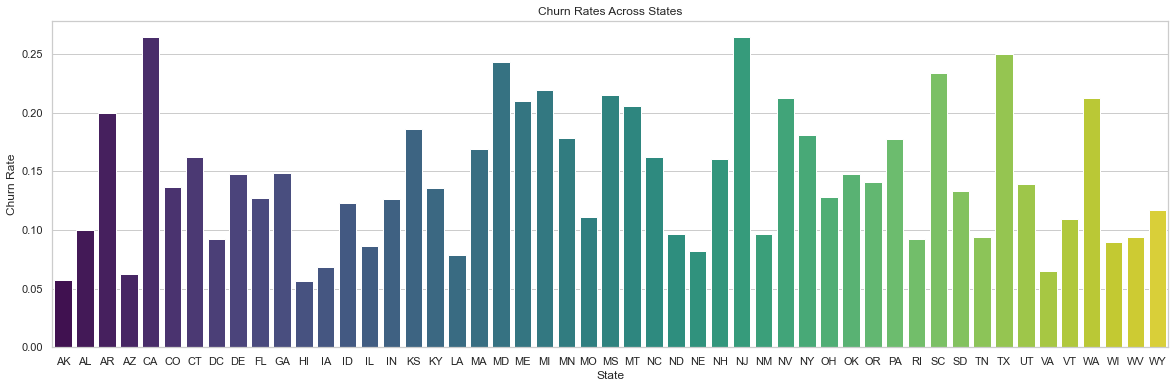

In [14]:
#Calculate churn rates for each state
state_churn_rates = df.groupby('state')['churn'].mean().reset_index()

# Find the state with the highest churn
state_highest_churn = state_churn_rates.loc[state_churn_rates['churn'].idxmax()]

# Find the state with the lowest churn
state_lowest_churn = state_churn_rates.loc[state_churn_rates['churn'].idxmin()]

print(f"State with the Highest Churn: {state_highest_churn['state']} (Churn Rate: {state_highest_churn['churn']:.2%})")
print(f"State with the Lowest Churn: {state_lowest_churn['state']} (Churn Rate: {state_lowest_churn['churn']:.2%})")

# Plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Create a bar plot
sns.barplot(x='state', y='churn', data=state_churn_rates, palette='viridis')

plt.title('Churn Rates Across States')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

State with the Highest Churn: CA (Churn Rate: 26.47%), However, State with the Lowest Churn: HI (Churn Rate: 5.66%). A churn rate of 26% in as single state is great revenue loss. The cause of such high rate can be due to factors such as poor network connectivity, influence of competitors in the area etc.

#### 4. Correlation:

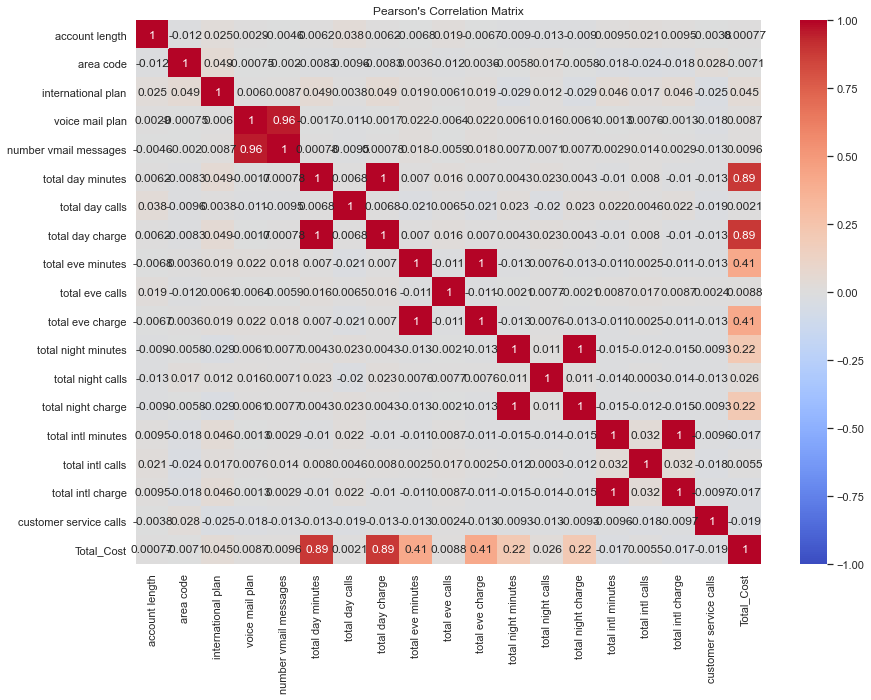

In [15]:
numeric_df = df.select_dtypes(include='number')

# Compute the Pearson correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson's Correlation Matrix")
plt.show()

### Features that have a significant impact on churn from the correlation matrix

###### 1. customer_service_calls :The frquency of a customer calling customer service

###### 2. international_plan : This is binary value that indicates that a customer has interbatianal call plans or not

###### 3.Total_Cost: This is the sum of day_charge , evening_charge, and night_charge to get a 24 hours cost of calls

###### 4. area code: This is the area that cutomers call from or reside.

### Relationship between churn and frequency of calls 

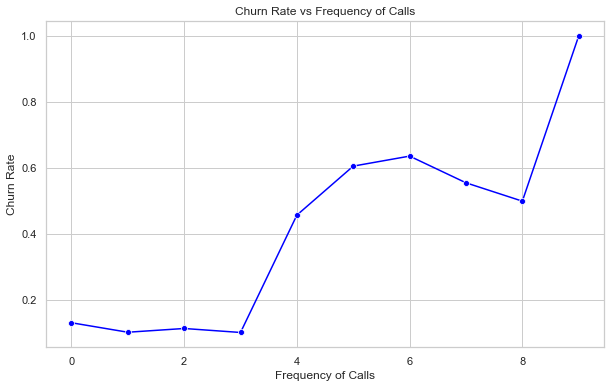

In [16]:
# Calculating the churn rate for each frequency of calls
churn_rate_by_calls = df.groupby('customer service calls')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='customer service calls', y='churn', data=churn_rate_by_calls, marker='o', color='blue')
plt.title('Churn Rate vs Frequency of Calls')
plt.xlabel('Frequency of Calls')
plt.ylabel('Churn Rate')
plt.show()

Churn rate increases with increase in the number of calls customers have with he custmer service. customers with average of 0-3 calls are less likely to churn as opposed to those who call 4 times and more.The rate increases sponteneosly when the frequency get above 8 times. There are several reasons for the increase; one would be the custmers problems were not solved despite making serveral attemps or question were not anwered. There is posibility that customes made several attempts reach custmer service and did not. Thus with more attempts, they resulted to churn. 

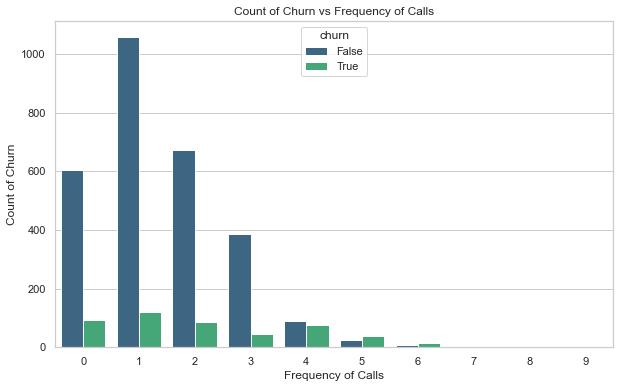

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer service calls', hue='churn', data=df, palette='viridis')
plt.title('Count of Churn vs Frequency of Calls')
plt.xlabel('Frequency of Calls')
plt.ylabel('Count of Churn')
plt.show()

The number of customer calling customere care 0-2 times are high and the ones churing are fewer. as the frqunecy of calls incerases, the number of customers calling are less with higher churn rate.

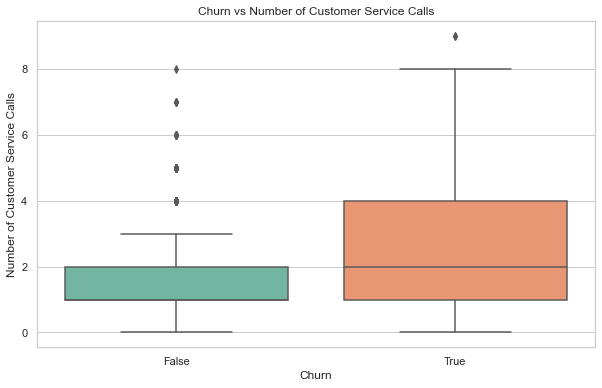

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer service calls', data=df, palette='Set2')
plt.title('Churn vs Number of Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()


Here is futhere proof that call frequency of less than 2 are likely to make customers churn

### Relationship between International Plan and Churn

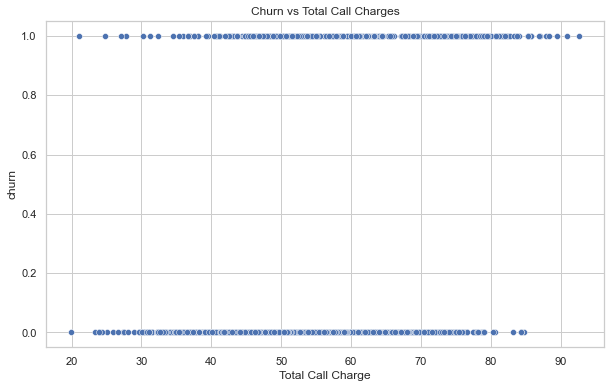

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Cost', y='churn', data=df, palette='Set2')
plt.title('Churn vs Total Call Charges')
plt.xlabel('Total Call Charge')
plt.ylabel('churn')
plt.show()


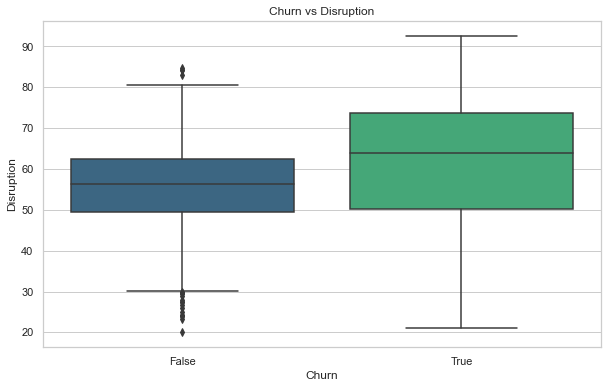

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='Total_Cost', data=df, palette='viridis')
plt.title('Churn vs Disruption')
plt.xlabel('Churn')
plt.ylabel('Disruption')
plt.show()

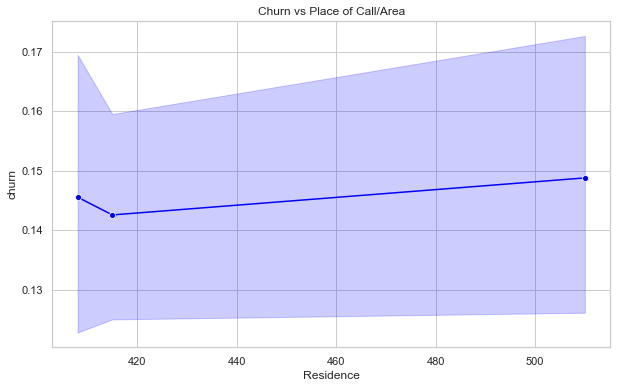

In [21]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='area code', y='churn', data=df, marker='o', color='blue')
# sns.scatterplot(x='churn', y='Total_Cost', data=df, palette='Set2')
plt.title('Churn vs Place of Call/Area')
plt.xlabel('Residence')
plt.ylabel('churn')
plt.show()


There is a weak relationship between place of residence/area code and churn rate but it is a faccter worth exploring

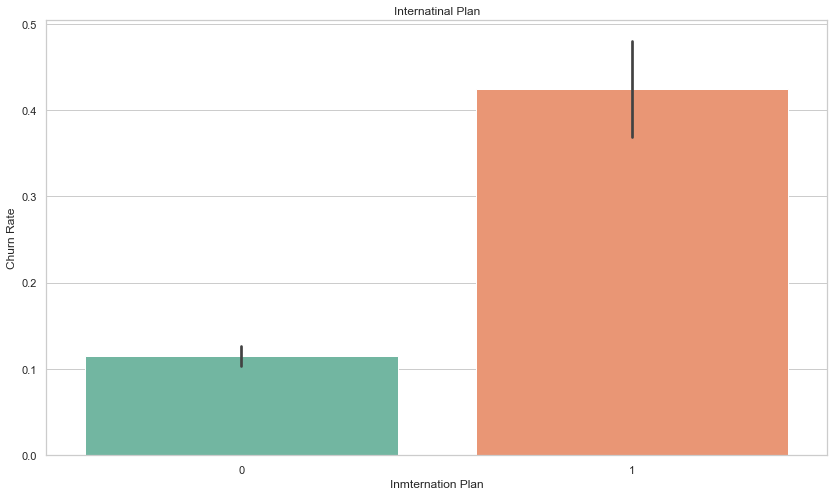

In [22]:
plt. figure (figsize=(14,8))
sns.barplot(x='international plan', y= 'churn', data= df,palette='Set2')
plt.title('Internatinal Plan')
plt.xlabel('Inmternation Plan')
plt.ylabel('Churn Rate')
plt.show()


Customers with International plan are likely churn as compaired to customers without a plan

In [23]:
df.corr()['churn']

account length            0.016541
area code                 0.006174
international plan        0.259852
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Total_Cost                0.226962
Name: churn, dtype: float64

# Modeling
The objective of this stage is to identify and build models to predict customer churn, helping SyriaTel identify customers at risk of leaving. This enables targeted retention strategies to reduce churn and retain valuable customers.

### Feature Selection
### The following are the feature which have been selceted for modeling 
##### 1. area code 
##### 2. International plan
##### 3. voice mail plan
##### 4. number vmail messages
##### 5. total day minutes
##### 6. total day calls 
##### 7. total day charge 
##### 8. total eve minutes
##### 9. total eve calls
##### 10. total eve charge  
##### 11. total night minutes
##### 12. total night calls
##### 13. total night charge
##### 14. total intl minutes
##### 15. total intl calls
##### 16. total intl charge
##### 17. customer service call
##### 18. Total_Cost

## Distribution of Churn

In [24]:
df['churn'] .value_counts()

False    2850
True      483
Name: churn, dtype: int64

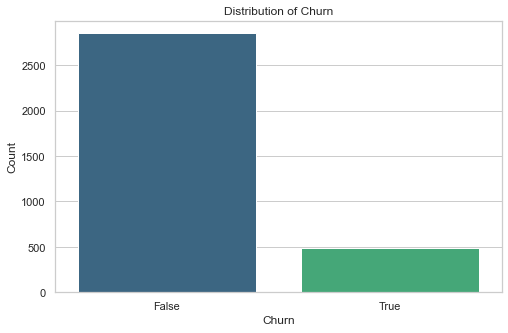

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

There is imbalance ditribution of "True" and "False" elemennts inte dataset.


In [26]:
# Chosing x and y features

y= df['churn']
X= df.drop(['churn','state','account length','phone number'], axis=1)

In [27]:
# Conducting a split 

from sklearn. model_selection import train_test_split 

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=27)

In [28]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model. fit(X_train, y_train)

LogisticRegression()

In [29]:

y_pred= model. predict(X_test)
model.score(X_test, y_pred)  


1.0

In [30]:
from sklearn. metrics import accuracy_score

print ('score :', model.score(X_test, y_pred))
print ('Accuracy :',accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)


score : 1.0
Accuracy : 0.8785607196401799


col_0,False,True
churn,,
False,578,9
True,72,8


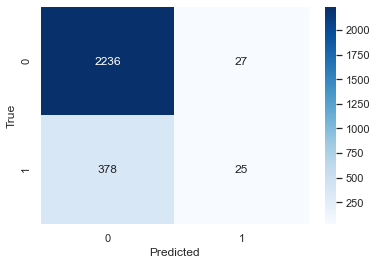

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model and it's stored in the variable 'model'
# Also, X_train and y_train are your training data and labels

# Get predictions
y_pred = model.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [32]:
from sklearn. metrics import classification_report
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print (classification_report(y_train, y_train_pred))
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2263
        True       0.48      0.06      0.11       403

    accuracy                           0.85      2666
   macro avg       0.67      0.53      0.51      2666
weighted avg       0.80      0.85      0.79      2666

              precision    recall  f1-score   support

       False       0.89      0.98      0.93       587
        True       0.47      0.10      0.16        80

    accuracy                           0.88       667
   macro avg       0.68      0.54      0.55       667
weighted avg       0.84      0.88      0.84       667



In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [34]:
X_train_somte, y_train_smote=smote. fit_resample(X_train.astype('float'),y_train)

In [35]:
from collections import Counter

print ('Before Smote:', Counter(y_train))
print ('After Smote:', Counter(y_train_smote))

Before Smote: Counter({False: 2263, True: 403})
After Smote: Counter({False: 2263, True: 2263})


In [36]:
model.fit(X_train_somte, y_train_smote)
y_pred= model. predict(X_test)
print ('Accuracy :',accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

Accuracy : 0.7211394302848576


col_0,False,True
churn,,
False,419,168
True,18,62


In [37]:
add= 19+61
61/add

0.7625

In [38]:
y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)

print (classification_report(y_train, y_train_pred))
print (classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.93      0.70      0.80      2263
        True       0.29      0.70      0.41       403

    accuracy                           0.70      2666
   macro avg       0.61      0.70      0.60      2666
weighted avg       0.83      0.70      0.74      2666

              precision    recall  f1-score   support

       False       0.96      0.71      0.82       587
        True       0.27      0.78      0.40        80

    accuracy                           0.72       667
   macro avg       0.61      0.74      0.61       667
weighted avg       0.88      0.72      0.77       667



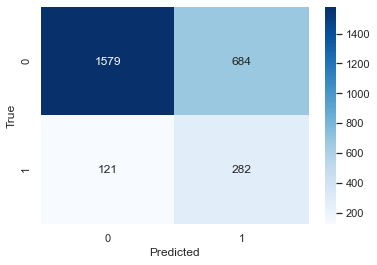

In [39]:
y_pred = model.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Modeling

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

def prepare_data():
    # Load your dataset and preprocess it as needed
    # Example: df = pd.read_csv('your_dataset.csv')
    # Preprocess and split the data into features (X) and target (y)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pass

# Logistic Regression Model
def logistic_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Random Forest Model
def random_forest_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Decision Tree Model
def decision_tree_model(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# K-Nearest Neighbors Model
def knn_model(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred))
    print("K-Nearest Neighbors Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Embedded Model (using Random Forest for feature selection)
def embedded_model(X_train, y_train, X_test, y_test):
    model = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Embedded Model Accuracy:", accuracy_score(y_test, y_pred))
    print("Embedded Model Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Example Usage
prepare_data()  # Call your data preparation function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model(X_train, y_train, X_test, y_test)
random_forest_model(X_train, y_train, X_test, y_test)
decision_tree_model(X_train, y_train, X_test, y_test)
knn_model(X_train, y_train, X_test, y_test)
embedded_model(X_train, y_train, X_test, y_test)


Logistic Regression Accuracy: 0.8515742128935532
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667

Random Forest Accuracy: 0.974512743628186
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Decision Tree Accuracy: 0.9355322338830585
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                ('classification', RandomForestClassifier(random_state=42))])

### Model Interpretation

### Hyperparameter Tuning

### Model Evaluation

Logistic Regression Accuracy: 0.8515742128935532
Logistic Regression Classification Report:


              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667

Random Forest Accuracy: 0.974512743628186
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Decision Tree Accuracy: 0.9355322338830585
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0.96       566
        True       0.75      0.85      0.80       101

    accuracy           

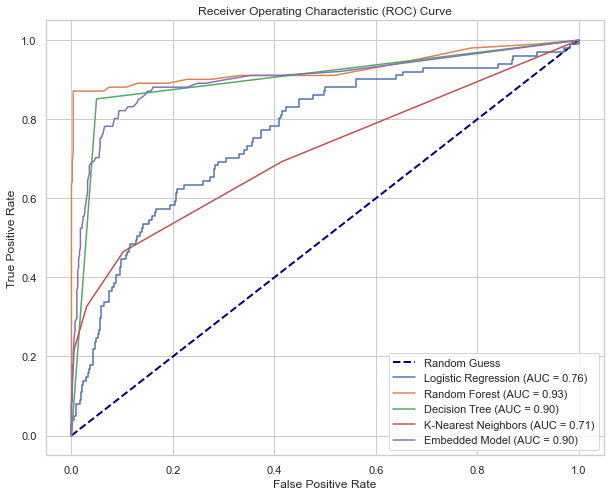

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(X_train, y_train, X_test, y_test, models):
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    for model_name, model_function in models.items():
        # Train the model
        model = model_function(X_train, y_train, X_test, y_test)
        
        # Get the predicted probabilities for each class
        y_proba = model.predict_proba(X_test)
        
        # If binary classification, use label 1 probabilities
        if len(np.unique(y_train)) == 2:
            y_proba = y_proba[:, 1]
            y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        else:
            # For multi-class classification, use one-vs-rest strategy
            y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        
        # Calculate AUC
        auc_score = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Example Usage
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Embedded Model": embedded_model
}

plot_roc_auc(X_train, y_train, X_test, y_test, models)


### Interpretation


### Model selection 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model with GridSearchCV
def logistic_model_grid_search(X_train, y_train, X_test, y_test):
    # Define the Logistic Regression model
    log_model = LogisticRegression(random_state=42)

    # Define hyperparameters and their possible values
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }

    # Use GridSearchCV for hyperparameter tuning
    log_grid = GridSearchCV(
        log_model, param_grid=param_grid, cv=5, n_jobs=-1
    )

    # Fit the model with the best hyperparameters
    log_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = log_grid.best_params_

    # Train the model with the best hyperparameters
    best_log_model = LogisticRegression(
        C=best_params['C'],
        penalty=best_params['penalty'],
        random_state=42
    )

    best_log_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred_log_tuned = best_log_model.predict(X_test)
    print("Logistic Regression (Tuned) Accuracy:", accuracy_score(y_test, y_pred_log_tuned))
    print(classification_report(y_test, y_pred_log_tuned))

    return best_log_model

# Random Forest Model with GridSearchCV
def random_forest_model_grid_search(X_train, y_train, X_test, y_test):
    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Define hyperparameters and their possible values
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use GridSearchCV for hyperparameter tuning
    rf_grid = GridSearchCV(
        rf_model, param_grid=param_grid, cv=5, n_jobs=-1
    )

    # Fit the model with the best hyperparameters
    rf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = rf_grid.best_params_

    # Train the model with the best hyperparameters
    best_rf_model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_features=best_params['max_features'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )

    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred_rf_tuned = best_rf_model.predict(X_test)
    print("Random Forest (Tuned) Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
    print(classification_report(y_test, y_pred_rf_tuned))

    return best_rf_model

# Decision Tree Model with GridSearchCV
def decision_tree_model_grid_search(X_train, y_train, X_test, y_test):
    # Define the Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)

    # Define hyperparameters and their possible values
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use GridSearchCV for hyperparameter tuning
    dt_grid = GridSearchCV(
        dt_model, param_grid=param_grid, cv=5, n_jobs=-1
    )

    # Fit the model with the best hyperparameters
    dt_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = dt_grid.best_params_

    # Train the model with the best hyperparameters
    best_dt_model = DecisionTreeClassifier(
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )

    best_dt_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred_dt_tuned = best_dt_model.predict(X_test)
    print("Decision Tree (Tuned) Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
    print(classification_report(y_test, y_pred_dt_tuned))

    return best_dt_model

# K-Nearest Neighbors Model with GridSearchCV
def knn_model_grid_search(X_train, y_train, X_test, y_test):
    # Define the K-Nearest Neighbors model
    knn_model = KNeighborsClassifier()

    # Define hyperparameters and their possible values
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    }

    # Use GridSearchCV for hyperparameter tuning
    knn_grid = GridSearchCV(
        knn_model, param_grid=param_grid, cv=5, n_jobs=-1
    )

    # Fit the model with the best hyperparameters
    knn_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = knn_grid.best_params_

    # Train the model with the best hyperparameters
    best_knn_model = KNeighborsClassifier(
        n_neighbors=best_params['n_neighbors'],
        weights=best_params['weights'],
        p=best_params['p']
    )

    best_knn_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred_knn_tuned = best_knn_model.predict(X_test)
    print("K-Nearest Neighbors (Tuned) Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
    print(classification_report(y_test, y_pred_knn_tuned))

    return best_knn_model

# Embedded Model with GridSearchCV


In [43]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the functions for the models with hyperparameter tuning
best_logistic_model = logistic_model_grid_search(X_train, y_train, X_test, y_test)
best_rf_model = random_forest_model_grid_search(X_train, y_train, X_test, y_test)
best_dt_model = decision_tree_model_grid_search(X_train, y_train, X_test, y_test)
best_knn_model = knn_model_grid_search(X_train, y_train, X_test, y_test)

# Assuming you have defined the embedded_model_grid_search function
# best_embedded_model = embedded_model_grid_search(X_train, y_train, X_test, y_test)


Logistic Regression (Tuned) Accuracy: 0.8500749625187406
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

Random Forest (Tuned) Accuracy: 0.974512743628186
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Decision Tree (Tuned) Accuracy: 0.967016491754123
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       566
        True       0.92      0.85      0.89       101

    accuracy             

### Predictions

In [50]:
from sklearn.ensemble import RandomForestClassifier

def predict_churn(area_code, international_plan, voice_mail_plan,
                  total_day_minutes, total_eve_minutes):
    # Assuming 'df' is your DataFrame with the mentioned features
    # X contains your feature columns, and y contains the target variable 'churn'
    
    # Selecting relevant features
    features = ['area code', 'international plan', 'voice mail plan',
                'total day minutes', 'total eve minutes']

    # Creating a DataFrame with the provided values
    input_data = pd.DataFrame([[area_code, international_plan, voice_mail_plan,
                                total_day_minutes, total_eve_minutes]],
                              columns=features)

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Assuming 'df' is your original DataFrame
    X = df[features]
    y = df['churn']

    # Fit the model
    rf_classifier.fit(X, y)

    # Make predictions
    predictions = rf_classifier.predict(input_data)

    return predictions

# Example usage:
area_code = 415
international_plan = 0  # 0 for No, 1 for Yes
voice_mail_plan = 1  # 0 for No, 1 for Yes
total_day_minutes = 200
total_eve_minutes = 150

result = predict_churn(area_code, international_plan, voice_mail_plan,
                        total_day_minutes, total_eve_minutes)

print(f'Churn Prediction: {result[0]}')


Churn Prediction: False


### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Function to perform hyperparameter tuning for Random Forest
def random_forest_hyperparameter_tuning(X_train, y_train, X_test, y_test):
    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Define hyperparameters and their possible values
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use RandomizedSearchCV for hyperparameter tuning
    rf_random = RandomizedSearchCV(
        rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1
    )

    # Fit the model with the best hyperparameters
    rf_random.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = rf_random.best_params_

    # Train the model with the best hyperparameters
    best_rf_model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_features=best_params['max_features'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )

    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred_rf_tuned = best_rf_model.predict(X_test)
    print("Random Forest (Tuned) Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
    print(classification_report(y_test, y_pred_rf_tuned))

    return best_rf_model

# Example Usage
best_rf_model = random_forest_hyperparameter_tuning(X_train, y_train, X_test, y_test)


Random Forest (Tuned) Accuracy: 0.974512743628186
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667



In [45]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Assuming you have X_train, X_test, y_train, y_test defined

# Logistic Regression Model
def logistic_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Random Forest Model
def random_forest_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Decision Tree Model
def decision_tree_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# K-Nearest Neighbors Model
def knn_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Embedded Model (using Random Forest for feature selection)
def embedded_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'classification__n_estimators': [50, 100, 200], 'classification__max_depth': [None, 10, 20]}
    model = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Compare models and parameters
models = {
    "Logistic Regression": logistic_model_grid_search,
    "Random Forest": random_forest_model_grid_search,
    "Decision Tree": decision_tree_model_grid_search,
    "K-Nearest Neighbors": knn_model_grid_search,
    "Embedded Model": embedded_model_grid_search
}

results = {'Model': [], 'Best Parameters': [], 'Accuracy': []}

for model_name, model_function in models.items():
    best_params, best_model, accuracy = model_function(X_train, y_train, X_test, y_test)
    
    results['Model'].append(model_name)
    results['Best Parameters'].append(best_params)
    results['Accuracy'].append(accuracy)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model                                    Best Parameters  \
0  Logistic Regression                                       {'C': 0.001}   
1        Random Forest            {'max_depth': None, 'n_estimators': 50}   
2        Decision Tree         {'max_depth': 10, 'min_samples_split': 10}   
3  K-Nearest Neighbors          {'n_neighbors': 7, 'weights': 'distance'}   
4       Embedded Model  {'classification__max_depth': 10, 'classificat...   

   Accuracy  
0  0.850075  
1  0.974513  
2  0.962519  
3  0.881559  
4  0.919040  


Performing Predictitin

In [46]:
# # import numpy as np
# from sklearn.ensemble import RandomForestClassifier

# def predict_churn(features):
#     """
#     Predict churn using a Random Forest model.

#     Parameters:
#     - features: List or array of five features for prediction.

#     Returns:
#     - prediction: The predicted churn (0 or 1).
#     """
#     # Load or train your Random Forest model (you should replace this with your actual model)
#     # For demonstration purposes, let's assume you have a pre-trained model
#     # If you have a trained model saved, you can load it using joblib or another method
#     # Example: loaded_model = joblib.load('path_to_your_model_file.pkl')
    
#     # This is a placeholder for a trained model, replace it with your actual model
#     rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
#     # Assuming X_train and y_train are your training data and labels
#     # You need to replace them with your actual training data
#     X_train = [[...], [...], ...]  # Replace ... with your actual feature values
#     y_train = [...]  # Replace ... with your actual labels
    
#     # Fit the model with training data
#     rf_model.fit(X_train, y_train)
    
#     # Reshape features to be compatible with model input (assuming they are in a list)
#     features = np.array(features).reshape(1, -1)
    
#     # Make predictions
#     prediction = rf_model.predict(features)
    
#     return prediction[0]  # Assuming prediction is a one-element array, return the actual prediction

# # Example Usage:
# # Replace [feature1, feature2, feature3, feature4, feature5] with your actual feature values
# feature_values = [1.0, 2.0, 3.0, 4.0, 5.0]
# result = predict_churn(feature_values)

# print(f"Churn Prediction: {result}")


In [47]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Total_Cost'],
      dtype='object')

                   Feature  Importance
17              Total_Cost    0.230844
16  customer service calls    0.131179
1       international plan    0.083150
6         total day charge    0.074082
4        total day minutes    0.073691
14        total intl calls    0.048534
3    number vmail messages    0.041363
13      total intl minutes    0.039267
15       total intl charge    0.038634
7        total eve minutes    0.037143
2          voice mail plan    0.036498
9         total eve charge    0.035455
10     total night minutes    0.026378
12      total night charge    0.025696
11       total night calls    0.025532
5          total day calls    0.023967
8          total eve calls    0.023227
0                area code    0.005360


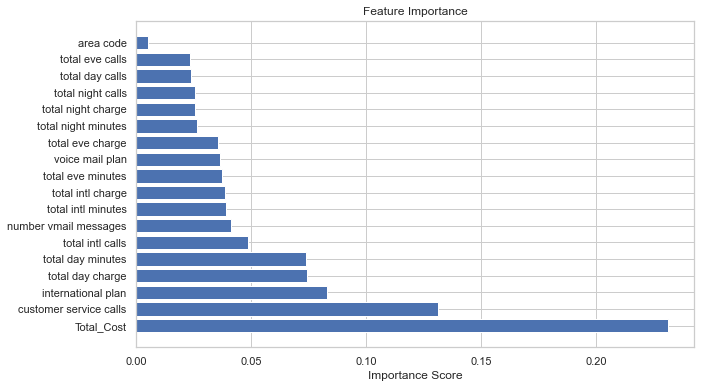

In [48]:
from sklearn.ensemble import RandomForestClassifier
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame with the mentioned features
# # X contains your feature columns, and y contains the target variable 'churn'
# X = df.drop(['churn'], axis=1)
# y = df['churn']

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()
